In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']


df = pd.read_csv(r"C:\Users\SREENITHI\Downloads\archive\KDDTrain+.txt", names=columns, header=None)

# 2. Basic Inspection
print("--- Dataset Info ---")
print(df.info())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 n

In [4]:
from IPython.display import display
print("\n--- First 5 Rows ---")
display(df.head())


--- First 5 Rows ---


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
# 3. Check for Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum().sum())


--- Missing Values ---
0


In [6]:
# 4. Target Variable Distribution (Text/Table Format)
# Calculate counts and percentages
attack_counts = df['attack'].value_counts()
attack_percent = df['attack'].value_counts(normalize=True) * 100

# Combine into a single readable DataFrame
attack_summary = pd.DataFrame({
    'Count': attack_counts,
    'Percentage (%)': attack_percent.round(2)
})

print("--- Attack Type Distribution ---")
print(attack_summary)

--- Attack Type Distribution ---
                 Count  Percentage (%)
attack                                
normal           67343           53.46
neptune          41214           32.72
satan             3633            2.88
ipsweep           3599            2.86
portsweep         2931            2.33
smurf             2646            2.10
nmap              1493            1.19
back               956            0.76
teardrop           892            0.71
warezclient        890            0.71
pod                201            0.16
guess_passwd        53            0.04
buffer_overflow     30            0.02
warezmaster         20            0.02
land                18            0.01
imap                11            0.01
rootkit             10            0.01
loadmodule           9            0.01
ftp_write            8            0.01
multihop             7            0.01
phf                  4            0.00
perl                 3            0.00
spy                  2         

In [7]:
# 5. Categorical Feature Analysis (Text/Table Format)
# Identify the Top 5 Attack types
top_5_attacks = df['attack'].value_counts().head(5).index

# Filter the dataframe to only include these top 5 attacks
df_filtered = df[df['attack'].isin(top_5_attacks)]

# Create a cross-tabulation table
protocol_attack_counts = pd.crosstab(df_filtered['protocol_type'], df_filtered['attack'])

# Add a 'Total' column for each protocol type and sort
protocol_attack_counts['Total'] = protocol_attack_counts.sum(axis=1)
protocol_attack_counts = protocol_attack_counts.sort_values(by='Total', ascending=False)

print("--- Top 5 Attack Types by Protocol (Counts) ---")
print(protocol_attack_counts)

--- Top 5 Attack Types by Protocol (Counts) ---
attack         ipsweep  neptune  normal  portsweep  satan   Total
protocol_type                                                    
tcp                482    41214   53600       2926   2184  100406
udp                  0        0   12434          0   1417   13851
icmp              3117        0    1309          5     32    4463


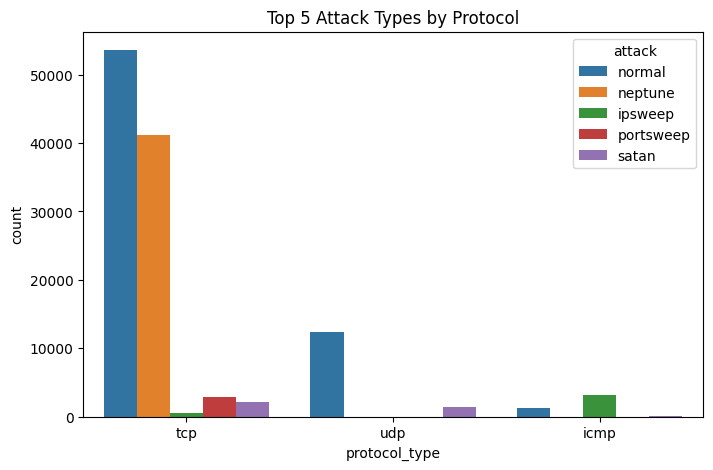

In [8]:
# 5. Categorical Feature Analysis (Protocol Type)
plt.figure(figsize=(8, 5))
sns.countplot(x='protocol_type', hue='attack', data=df[df['attack'].isin(df['attack'].value_counts().head(5).index)])
plt.title('Top 5 Attack Types by Protocol')
plt.show()

In [9]:
# 6. Statistical Summary of Numerical Features
print("\n--- Numerical Summary ---")
display(df.describe())


--- Numerical Summary ---


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000
